In [22]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(211), [0, 0, 0, 1, 26])
print("Order of E =", E.order())
P = E([6, 44])
Q = 147*P#E([33,57])

k, log = SmartAttack(P, Q, 211, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 211
Recovered k: 147
Log: {'time_total': 0.011414051055908203, 'time_liftP': 0.002877473831176758, 'time_liftQ': 0.0004329681396484375, 'retries': 0}


In [13]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(787), [0, 0, 0, 1, 85])
print("Order of E =", E.order())
P = E([6, 404])
Q = 578*P#E([33,57])

k, log = SmartAttack(P, Q, 787, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 787
Recovered k: 578
Log: {'time_total': 0.01867365837097168, 'time_liftP': 0.0027184486389160156, 'time_liftQ': 0.0008459091186523438, 'retries': 0}


In [12]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(1493), [0, 0, 0, 1, 20])
print("Order of E =", E.order())
P = E([41, 464])
Q = 576*P#E([33,57])

k, log = SmartAttack(P, Q, 1493, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 1493
Recovered k: 576
Log: {'time_total': 0.010606050491333008, 'time_liftP': 0.001455068588256836, 'time_liftQ': 0.00024366378784179688, 'retries': 0}


In [13]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(6287), [0, 0, 0, 1, 1795])
print("Order of E =", E.order())
P = E([38, 781])
Q = 2387*P#E([33,57])

k, log = SmartAttack(P, Q, 6287, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 6287
Recovered k: 2387
Log: {'time_total': 0.010593891143798828, 'time_liftP': 0.002488851547241211, 'time_liftQ': 0.0004589557647705078, 'retries': 0}


In [15]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(49171), [0, 0, 0, 1, 1323])
print("Order of E =", E.order())
P = E([8145, 12269])
Q = 18765*P#E([33,57])

k, log = SmartAttack(P, Q, 49171, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 49171
Recovered k: 18765
Log: {'time_total': 0.015842199325561523, 'time_liftP': 0.0070171356201171875, 'time_liftQ': 0.0005190372467041016, 'retries': 0}


In [16]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(739397), [0, 0, 0, 1, 8576])
print("Order of E =", E.order())
P = E([481288,591092])
Q = 678765*P#E([33,57])

k, log = SmartAttack(P, Q, 739397, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 739397
Recovered k: 678765
Log: {'time_total': 0.012257814407348633, 'time_liftP': 0.002457857131958008, 'time_liftQ': 0.0004544258117675781, 'retries': 0}


In [17]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(9876413), [0, 0, 0, 1, 2748])
print("Order of E =", E.order())
P = E([3389659,4281381])
Q = 6786765*P#E([33,57])

k, log = SmartAttack(P, Q, 9876413, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 9876413
Recovered k: 6786765
Log: {'time_total': 0.010073661804199219, 'time_liftP': 0.0018224716186523438, 'time_liftQ': 0.00033593177795410156, 'retries': 0}


In [18]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(971767), [0, 0, 0, 1, 2114])
print("Order of E =", E.order())
P = E([768383,307467])
Q = 678675*P#E([33,57])

k, log = SmartAttack(P, Q, 971767, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 971767
Recovered k: 678675
Log: {'time_total': 0.012492179870605469, 'time_liftP': 0.0019233226776123047, 'time_liftQ': 0.000377655029296875, 'retries': 0}


In [19]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(823553), [0, 0, 0, 1, 3550])
print("Order of E =", E.order())
P = E([749291,346585])
Q = 671575*P#E([33,57])

k, log = SmartAttack(P, Q, 823553, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 823553
Recovered k: 671575
Log: {'time_total': 0.012156486511230469, 'time_liftP': 0.0020482540130615234, 'time_liftQ': 0.0003941059112548828, 'retries': 0}


In [7]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(7715177), [0, 0, 0, 1, 41191])
print("Order of E =", E.order())
P = E([3250318,3442928])
Q = 6715759*P#E([33,57])

k, log = SmartAttack(P, Q, 7715177, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 7715177
Recovered k: 6715759
Log: {'time_total': 0.016621828079223633, 'time_liftP': 0.0023279190063476562, 'time_liftQ': 0.0005252361297607422, 'retries': 0}


In [4]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(492113), [0, 0, 0, 1, 3700])
print("Order of E =", E.order())
P = E([1441,100818])
Q = 315759*P#E([33,57])

k, log = SmartAttack(P, Q, 492113, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 492113
Recovered k: 315759
Log: {'time_total': 0.013718128204345703, 'time_liftP': 0.002251148223876953, 'time_liftQ': 0.0005371570587158203, 'retries': 0}


In [3]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(8396981), [0, 0, 0, 1, 60387])
print("Order of E =", E.order())
P = E([4065432,6420508])
Q = 5315739*P#E([33,57])

k, log = SmartAttack(P, Q, 8396981, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 8396981
Recovered k: 5315739
Log: {'time_total': 0.015752315521240234, 'time_liftP': 0.0023009777069091797, 'time_liftQ': 0.000579833984375, 'retries': 0}


In [3]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(96911), [0, 0, 0, 1, 4115])
print("Order of E =", E.order())
P = E([73549,93995])
Q = 53157*P#E([33,57])

k, log = SmartAttack(P, Q, 96911, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 96911
Recovered k: 53157
Log: {'time_total': 0.011559247970581055, 'time_liftP': 0.0019106864929199219, 'time_liftQ': 0.0003485679626464844, 'retries': 0}


In [75]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(81119), [0, 0, 0, 1, 2058])
print("Order of E =", E.order())
P = E([24018,43237])
Q = 63857*P#E([33,57])

k, log = SmartAttack(P, Q, 81119, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 81119
Recovered k: 63857
Log: {'time_total': 0.01273345947265625, 'time_liftP': 0.0023849010467529297, 'time_liftQ': 0.0004642009735107422, 'retries': 0}


In [7]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(9973), [0, 0, 0, 1, 670])
print("Order of E =", E.order())
P = E([5502,6635])
Q = 6857*P#E([33,57])

k, log = SmartAttack(P, Q, 9973, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 9973
Recovered k: 6857
Log: {'time_total': 0.017327308654785156, 'time_liftP': 0.0026426315307617188, 'time_liftQ': 0.0006458759307861328, 'retries': 0}


In [23]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(6181009), [0, 0, 0, 1, 2426])
print("Order of E =", E.order())
P = E([1026694,3972468])
Q = 5787345*P#E([33,57])

k, log = SmartAttack(P, Q, 6181009, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 6181009
Recovered k: 5787345
Log: {'time_total': 0.010489463806152344, 'time_liftP': 0.0008094310760498047, 'time_liftQ': 0.0005340576171875, 'retries': 0}


In [21]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(3223223), [0, 0, 0, 1, 2671])
print("Order of E =", E.order())
P = E([128553,2854083])
Q = 2787394*P#E([33,57])

k, log = SmartAttack(P, Q, 3223223, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 3223223
Recovered k: 2787394
Log: {'time_total': 0.012307405471801758, 'time_liftP': 0.0014362335205078125, 'time_liftQ': 0.0007882118225097656, 'retries': 0}


Linear fit: y = 97.82935652849513*x + -221.7094454032656


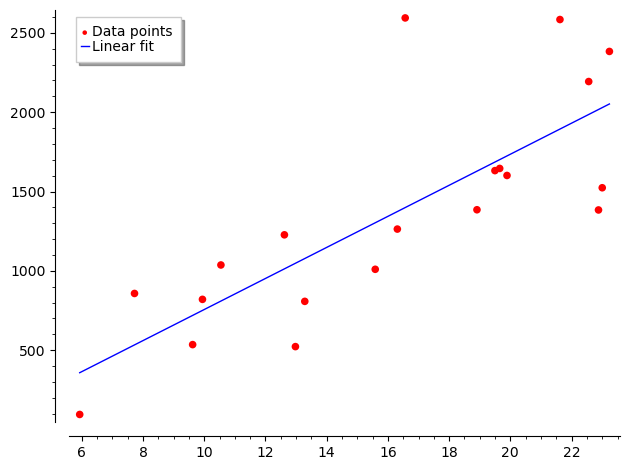

In [2]:
# Plotting data
points = [
    (5.930737338, 95.47754686),
    (7.721099189, 857.7248847),
    (9.620219826, 535.5039092),
    (9.941047606, 820.546484),
    (10.54399845, 1037.148784),
    (12.61815605, 1227.109685),
    (12.97817417, 522.8653019),
    (13.28381183, 807.9875339),
    (15.58552008, 1009.973488),
    (16.30775225, 1263.28305),
    (16.56437281, 2593.440122),
    (18.9086301, 1385.041551),
    (19.49598966, 1631.587535),
    (19.65150197, 1645.278052),
    (19.89025092, 1601.024656),
    (21.62007257, 2583.372475),
    (22.55941094, 2192.773382),
    (22.87926782, 1383.708338),
    (23.00143929, 1523.616049),
    (23.23555574, 2382.370459)
]


x_data = [p[0] for p in points]
y_data = [p[1] for p in points]

var('a b')
linear_model(x) = a*x + b
params_linear = find_fit(list(zip(x_data, y_data)), linear_model, solution_dict=True)
a_val = params_linear[a]
b_val = params_linear[b]
f_linear(x) = a_val*x + b_val
print(f"Linear fit: y = {a_val}*x + {b_val}")

point_plot = list_plot(points, color='red', size=30, legend_label='Data points')
linear_plot = plot(f_linear, (min(x_data), max(x_data)), color='blue', legend_label='Linear fit')

final_plot = point_plot + linear_plot

show(final_plot)


Linear fit: y = -0.0009735584307177803*x + 0.031781264106839235


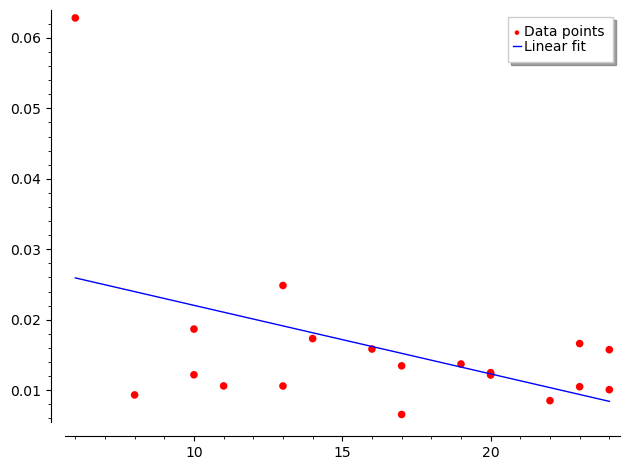

In [42]:
# Plotting data
points = [
    (6,0.062842),
    (8, 0.009327),
    (10, 0.018674),
    (10, 0.012187),
    (11, 0.010606),
    (13, 0.010594),
    (13, 0.024863),
    (14, 0.017327),
    (16, 0.015842),
    (17, 0.013457),
    (17, 0.006555),
    (19, 0.013718),
    (20, 0.012258),
    (20, 0.012156),
    (20, 0.012492),
    (22, 0.008516),
    (23, 0.010489),
    (23, 0.016622),
    (24, 0.015752),
    (24, 0.010074)
]


x_data = [p[0] for p in points]
y_data = [p[1] for p in points]

var('a b')
linear_model(x) = a*x + b
params_linear = find_fit(list(zip(x_data, y_data)), linear_model, solution_dict=True)
a_val = params_linear[a]
b_val = params_linear[b]
f_linear(x) = a_val*x + b_val
print(f"Linear fit: y = {a_val}*x + {b_val}")

point_plot = list_plot(points, color='red', size=30, legend_label='Data points')
linear_plot = plot(f_linear, (min(x_data), max(x_data)), color='blue', legend_label='Linear fit')

final_plot = point_plot + linear_plot

show(final_plot)


Linear fit: y = -0.08460249286322681*x + -5.965208822658088


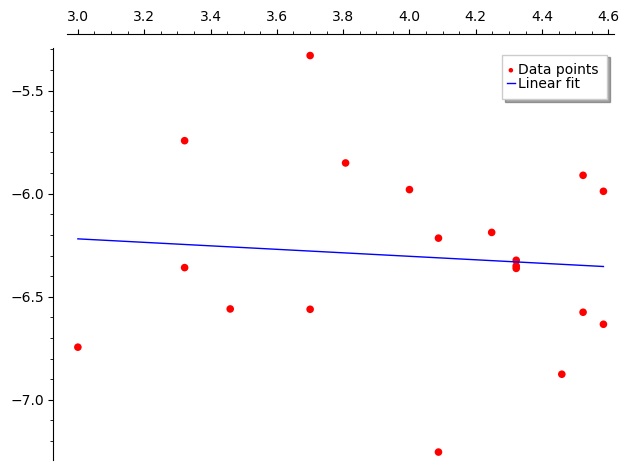

In [17]:
# Plotting data
points = [
    (2.584962501, -3.992127093),
    (3, -6.744371167),
    (3.321928095, -5.742825202),
    (3.321928095, -6.35851316),
    (3.459431619, -6.558975536),
    (3.700439718, -6.560608776),
    (3.700439718, -5.329855806),
    (3.807354922, -5.850834302),
    (4, -5.980101707),
    (4.087462841, -6.215499367),
    (4.087462841, -7.253188504),
    (4.247927513, -6.187786029),
    (4.321928095, -6.35013258),
    (4.321928095, -6.36218761),
    (4.321928095, -6.322851715),
    (4.459431619, -6.875608335),
    (4.523561956, -6.574979049),
    (4.523561956, -5.910762209),
    (4.584962501, -5.988321173),
    (4.584962501, -6.633219554)
]



x_data = [p[0] for p in points]
y_data = [p[1] for p in points]

var('a b')
linear_model(x) = a*x + b
params_linear = find_fit(list(zip(x_data, y_data)), linear_model, solution_dict=True)
a_val = params_linear[a]
b_val = params_linear[b]
f_linear(x) = a_val*x + b_val
print(f"Linear fit: y = {a_val}*x + {b_val}")

point_plot = list_plot(points, color='red', size=30, legend_label='Data points')
linear_plot = plot(f_linear, (min(x_data), max(x_data)), color='blue', legend_label='Linear fit')

final_plot = point_plot + linear_plot

show(final_plot)


In [2]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(2000639), [0, 0, 0, 1, 2673])
print("Order of E =", E.order())
P = E([1563430,454757])
Q = 1287394*P

k, log = SmartAttack(P, Q, 2000639, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 2000639
Recovered k: 1287394
Log: {'time_total': 0.014560937881469727, 'time_liftP': 0.0020983219146728516, 'time_liftQ': 0.0005478858947753906, 'retries': 0}


In [37]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(3547), [0, 0, 0, 1, 303])
print("Order of E =", E.order())
P = E([2383,3334])
Q = 3287*P

k, log = SmartAttack(P, Q, 3547, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 3547
Recovered k: 3287
Log: {'time_total': 0.010432958602905273, 'time_liftP': 0.0016701221466064453, 'time_liftQ': 0.0003731250762939453, 'retries': 0}


In [38]:
from sage.all import *
import time

def HenselLift(P, p, prec):
    t0 = time.time()
    E = P.curve()
    Eq = E.change_ring(QQ)          
    Ep = Eq.change_ring(Qp(p, prec))  
    x_P, y_P = P.xy()

    x_lift = ZZ(x_P)
    y_lift = ZZ(y_P)

    a1, a2, a3, a4, a6 = [ZZ(Eq.a1()), ZZ(Eq.a2()), ZZ(Eq.a3()), ZZ(Eq.a4()), ZZ(Eq.a6())]
    rhs = x_lift^3 + a2*x_lift^2 + a4*x_lift + a6
    F = lambda y: y^2 + a1*x_lift*y + a3*y - rhs
    F_prime = lambda y: 2*y + a1*x_lift + a3

    if Mod(F(y_lift), p) != 0:
        raise ValueError("Initial point is not a root mod p.")
    if Mod(F_prime(y_lift), p) == 0:
        raise ValueError("Derivative is zero mod p. Hensel's Lemma fails.")

    for i in range(1, prec):
        f_val = F(y_lift)
        f_prime_val = F_prime(y_lift)
        u_inv = inverse_mod(f_prime_val, p^i)
        y_lift = ZZ(Mod(y_lift - u_inv * f_val, p^(i+1)))

    Qp_ring = Qp(p, prec)
    x_qp = Qp_ring(x_lift)
    y_qp = Qp_ring(y_lift)
    P_qp = Ep([x_qp, y_qp])
    t1 = time.time()
    return P_qp, (t1 - t0)

def SmartAttack(P_tilde, Q_tilde, p, prec):
    t0 = time.time()
    E_tilde = P_tilde.curve()
    Eq = E_tilde.change_ring(QQ)

    retries = 0
    while True:
        Ep = Eq.change_ring(Qp(p, prec))
        P, t_liftP = HenselLift(P_tilde, p, prec)
        Q, t_liftQ = HenselLift(Q_tilde, p, prec)
        pP = p * P
        val = pP[0].valuation()
        if val > -4:
            break
        retries += 1
        Eq = EllipticCurve([c + p*randint(1, 10) for c in Eq.a_invariants()])

    pQ = p * Q
    phi_P = -(pP[0] / pP[1])
    phi_Q = -(pQ[0] / pQ[1])
    k = phi_Q / phi_P
    t1 = time.time()
    return Mod(k, p), {
        "time_total": t1 - t0,
        "time_liftP": t_liftP,
        "time_liftQ": t_liftQ,
        "retries": retries
    }

# Example run
E = EllipticCurve(GF(22229), [0, 0, 0, 1, 1198])
print("Order of E =", E.order())
P = E([19545,20071])
Q = 13287*P

k, log = SmartAttack(P, Q, 22229, 2)
print("Recovered k:", k)
print("Log:", log)


Order of E = 22229
Recovered k: 13287
Log: {'time_total': 0.017652273178100586, 'time_liftP': 0.003034353256225586, 'time_liftQ': 0.0007221698760986328, 'retries': 0}


Linear fit: y = -2.9698006318801262e-05*x + 0.01388133021026261


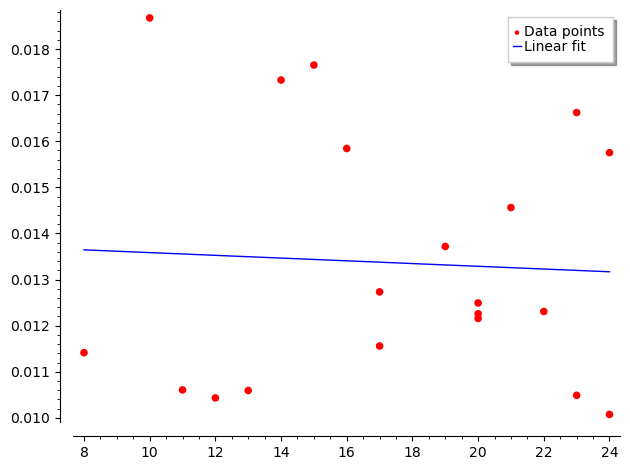

In [39]:
# Plotting data
points = [
    (8, 0.011414),
    (10, 0.018674),
    (11, 0.010606),
    (12, 0.010432),
    (13, 0.010594),
    (14, 0.017327),
    (15, 0.017652),
    (16, 0.015842),
    (17, 0.012733),
    (17, 0.011559),
    (19, 0.013718),
    (20, 0.012258),
    (20, 0.012156),
    (20, 0.012492),
    (21, 0.014561),
    (22, 0.012307),
    (23, 0.010489),
    (23, 0.016622),
    (24, 0.015752),
    (24, 0.010074)
]



x_data = [p[0] for p in points]
y_data = [p[1] for p in points]

var('a b')
linear_model(x) = a*x + b
params_linear = find_fit(list(zip(x_data, y_data)), linear_model, solution_dict=True)
a_val = params_linear[a]
b_val = params_linear[b]
f_linear(x) = a_val*x + b_val
print(f"Linear fit: y = {a_val}*x + {b_val}")

point_plot = list_plot(points, color='red', size=30, legend_label='Data points')
linear_plot = plot(f_linear, (min(x_data), max(x_data)), color='blue', legend_label='Linear fit')

final_plot = point_plot + linear_plot

show(final_plot)


Linear fit: y = -0.00021059697360636953*x + -6.2521320442611525


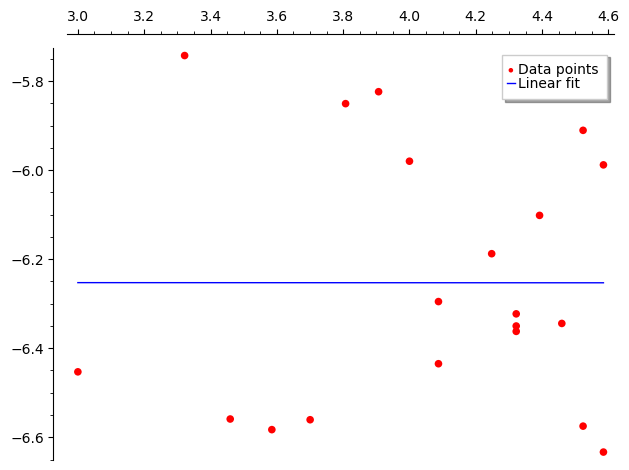

In [40]:
# Plotting data
points = [
    (3, -6.453051722),
    (3.321928095, -5.742825202),
    (3.459431619, -6.558975536),
    (3.584962501, -6.582840415),
    (3.700439718, -6.560608776),
    (3.807354922, -5.850834302),
    (3.906890596, -5.824024537),
    (4, -5.980101707),
    (4.087462841, -6.29528382),
    (4.087462841, -6.434839598),
    (4.247927513, -6.187786029),
    (4.321928095, -6.35013258),
    (4.321928095, -6.36218761),
    (4.321928095, -6.322851715),
    (4.392317423, -6.101746751),
    (4.459431619, -6.344377062),
    (4.523561956, -6.574979049),
    (4.523561956, -5.910762209),
    (4.584962501, -5.988321173),
    (4.584962501, -6.633219554)
]



x_data = [p[0] for p in points]
y_data = [p[1] for p in points]

var('a b')
linear_model(x) = a*x + b
params_linear = find_fit(list(zip(x_data, y_data)), linear_model, solution_dict=True)
a_val = params_linear[a]
b_val = params_linear[b]
f_linear(x) = a_val*x + b_val
print(f"Linear fit: y = {a_val}*x + {b_val}")

point_plot = list_plot(points, color='red', size=30, legend_label='Data points')
linear_plot = plot(f_linear, (min(x_data), max(x_data)), color='blue', legend_label='Linear fit')

final_plot = point_plot + linear_plot

show(final_plot)
